In [1]:
import sys
sys.path.insert(0, '../')


from src.factories.metric import calculate_image_precision, calculate_precision
import numpy as np
import pandas as pd
from src.config import Config
from src.types import Boxes, Box, Imgs, Img
from src.utils import timer, start_mlflow, seed_everything
from src.factories import WheatData, WheatDataset, Transforms, Fitter
from src.visualize import imshow_with_bboxes
from src.factories import (
    get_data,
    get_wheat_dataset,
    get_wheat_dataloader,
    get_transforms,
    get_fitter,
    get_effdet_eval,
    get_tta_transforms,
    make_predictions,
    run_wbf,
)
import torch
import torch.utils
import mlflow

from typing import List


In [2]:

config = Config("..")
seed_everything(config.seed)
transforms: Transforms = get_transforms()


with timer("load raw data"):
    data: WheatData = get_data(config.INPUT_DIR)

precisions: List[float] = []
cv_num = 0
with timer("prepare dataloader and fitter"):
    train_image_ids, train_df, val_image_ids, val_df = data.get_fold(cv_num)

    train_dataset: WheatDataset = get_wheat_dataset(
        config.INPUT_DIR,
        train_image_ids,
        train_df,
        "train",
        transforms.get_train_transforms(),
    )
    valid_dataset: WheatDataset = get_wheat_dataset(
        config.INPUT_DIR,
        val_image_ids,
        val_df,
        "train",
        transforms.get_valid_transforms(),
    )

    train_loader = get_wheat_dataloader(train_dataset, config, "train")
    valid_loader = get_wheat_dataloader(valid_dataset, config, "valid")

    fitter: Fitter = get_fitter(cv_num=cv_num, config=config, start_time=None)

[load raw data] start
[load raw data] done in 1.4098 s

[prepare dataloader and fitter] start
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1469: DeprecationWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn("This class has been deprecated. Please use CoarseDropout", DeprecationWarning)
[prepare dataloader and fitter] done in 3.5564 s



/opt/conda/conda-bld/pytorch_1591914855613/work/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:85: UserWarning: Y2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.
  warnings.warn('Y2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:73: UserWarning: X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.
  warnings.warn('X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:76: UserWarning: Y1 < 0 in 


No.0 Score:0.2793942772203642


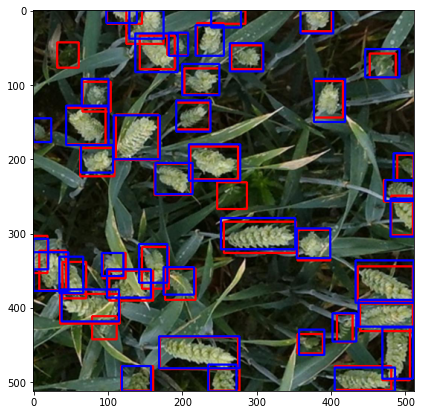

/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:64: UserWarning: X1 < 0 in box. Set it to 0.
  warnings.warn('X1 < 0 in box. Set it to 0.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:73: UserWarning: X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.
  warnings.warn('X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:76: UserWarning: Y1 < 0 in box. Set it to 0.
  warnings.warn('Y1 < 0 in box. Set it to 0.')



No.1 Score:0.1866770616770617


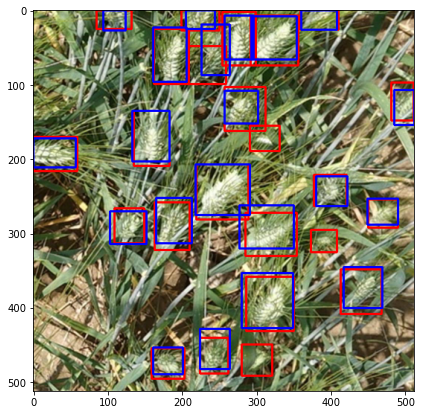

/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:85: UserWarning: Y2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.
  warnings.warn('Y2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:73: UserWarning: X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.
  warnings.warn('X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:64: UserWarning: X1 < 0 in box. Set it to 0.
  warnings.warn('X1 < 0 in box. Set it to 0.')



No.2 Score:0.16256407086655633


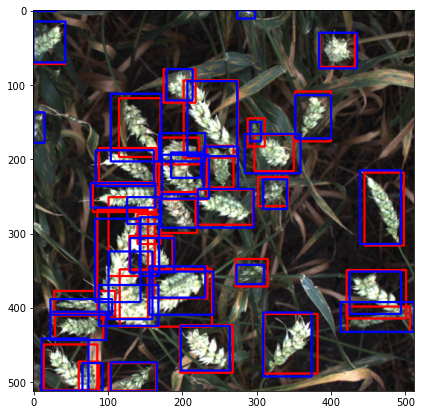


No.3 Score:0.35400132275132273


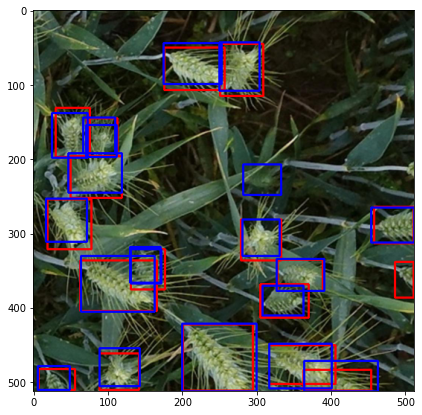

/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:76: UserWarning: Y1 < 0 in box. Set it to 0.
  warnings.warn('Y1 < 0 in box. Set it to 0.')



No.4 Score:0.2949584085592977


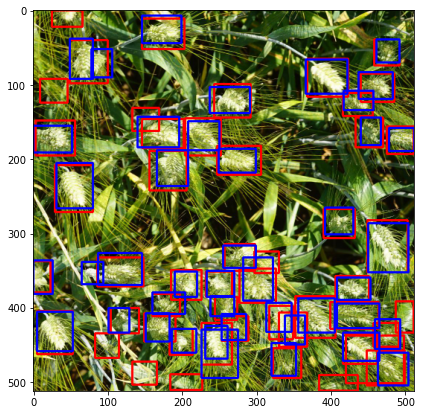


No.5 Score:0.16684982125050846


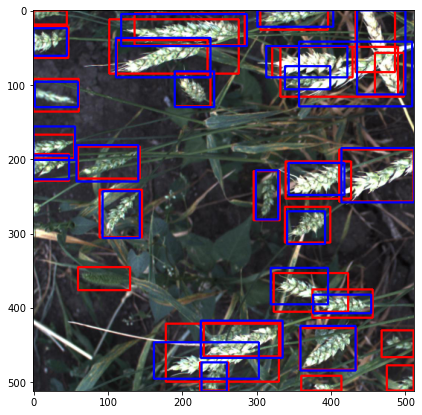


No.6 Score:0.46428571428571425


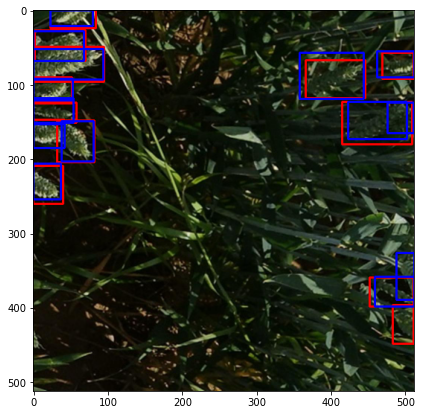


No.7 Score:0.29804336886512045


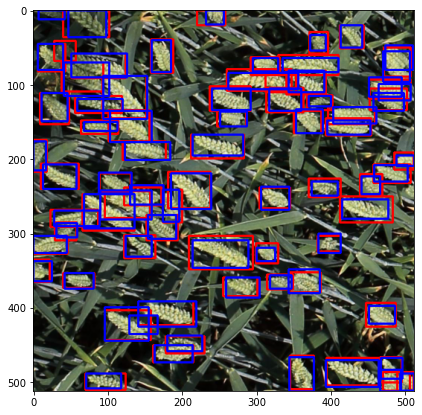


No.8 Score:0.3125637889688238


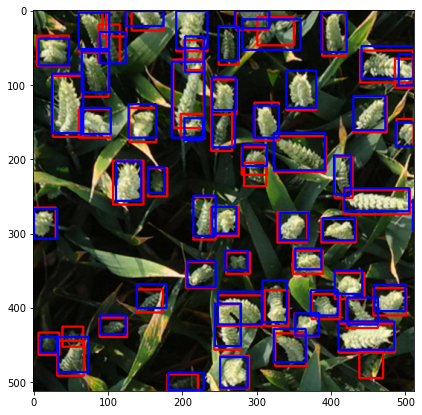


No.9 Score:0.21652789080486523


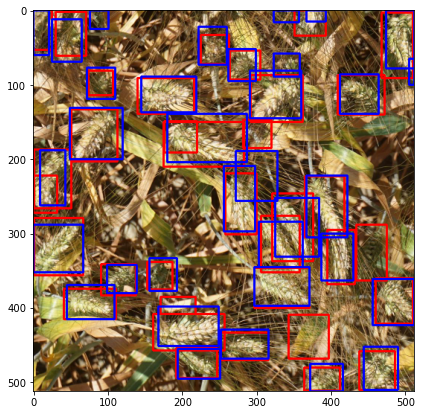


No.10 Score:0.2060510344502452


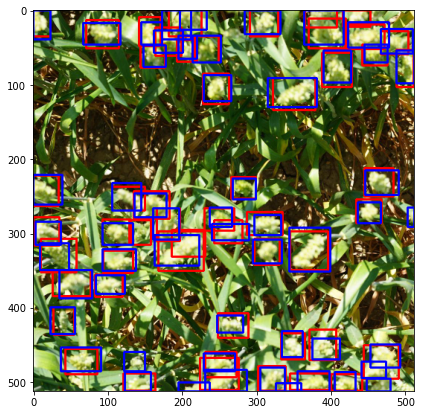

In [5]:
from src import show_eval_result

show_eval_result(
    f"{config.WORK_DIR}/output/2020-07-28T11:15:34.359294/best-checkpoint_cv0.bin",
    config,
    valid_loader,
    get_tta_transforms(),
    idx_start=0,
    idx_end=10,
)